# KNN - K Nearest Neighbors

KNN is a non-parametric, instance-based learning algorithm. It doesn’t learn a model during training, but rather memorizes the training data. At prediction time, it finds the K nearest neighbors and uses majority voting (for classification) or average (for regression) to predict the label.

# Code from scratch

In [6]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X):
        predictions = []
        for x in X:
            # Step 1: Compute distances from x to all training examples
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            
            # Step 2: Find indices of k smallest distances
            k_indices = np.argsort(distances)[:self.k]
            
            # Step 3: Retrieve the labels of the k nearest neighbors
            k_labels = [self.y_train[i] for i in k_indices]
            
            # Majority vote - Assign the class label that appears most frequently among the k nearest neighbors
            # Step 4: Majority vote (for multi-class classification)
            # Prediction: y_hat = mode({y_1, y_2, ..., y_k})
            most_common = Counter(k_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a simple 2D binary classification dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train custom KNN
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.875


## Plotting Decision Boundry

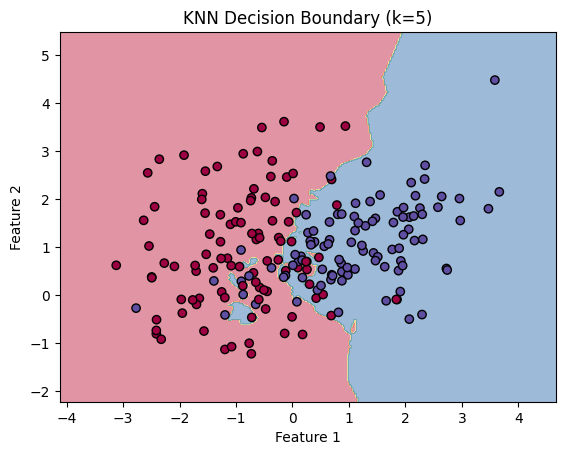

In [3]:
import matplotlib.pyplot as plt

# Create a meshgrid
x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300)
x2 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
xx, yy = np.meshgrid(x1, x2)

# Predict over the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# K-Nearest Neighbors Regression

MSE: 331.2367450117966


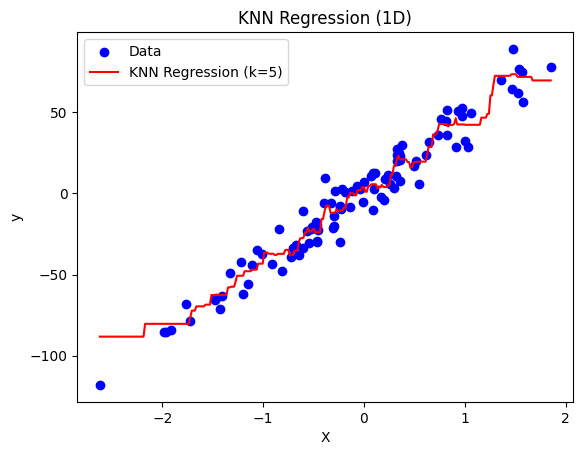

In [4]:
import numpy as np

class KNNRegressor:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_values = [self.y_train[i] for i in k_indices]
            predictions.append(np.mean(k_nearest_values))
        return np.array(predictions)


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset (2D)
X, y = make_regression(n_samples=200, n_features=2, noise=10, random_state=42)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Regressor
knn_reg = KNNRegressor(k=5)
knn_reg.fit(X_train, y_train)

# Predict
y_pred = knn_reg.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt

# 1D example
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
knn_reg = KNNRegressor(k=5)
knn_reg.fit(X, y)

# Prediction line
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = knn_reg.predict(X_plot)

# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_plot, y_plot, color='red', label='KNN Regression (k=5)')
plt.title("KNN Regression (1D)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Code using sklrean

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 437.3544619132517
